<a href="https://colab.research.google.com/github/Vineeth37/Deep_Learning/blob/main/ANN_MultiLabel_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df['species'] = df['species'].map({'setosa':0,'versicolor':1,'virginica':2}).astype(int)

In [ ]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
132,6.4,2.8,5.6,2.2,2
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
69,5.6,2.5,3.9,1.1,1
60,5.0,2.0,3.5,1.0,1


In [ ]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train),len(y_train)

(120, 120)

In [ ]:
len(X_test),len(y_test)

(30, 30)

- `we can give the above data to any machine learning classification Algorithm like KNN, Logistic Regression , Naive Bayes   etc... -> but we can also give the same data to ANN Architecture also ....`


- `to Develop Deep learning ANN we have Many Libraries like `
      - `Tensorflow ***`
      - `Keras`
      - `Pytorch *****`
      - `Caffee`
      - `Maxnet `
      - `Theano `

since in the initial stage we are going to use tensoflow and develop the Entire Deep learning ANN for Above training data and also I am going to use test data for finding the Performance

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # dense -> hidden layer
from tensorflow.keras.activations import sigmoid,relu

In [ ]:
X.shape[1]

4

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = Sequential() # Sequntial is used to build architectures and it is a class -> model is an object for that

model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu',input_dim = X.shape[1])) # HL1

model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu')) # HL2

model.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu')) # HL3

model.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu')) # HL4


model.add(Dense(units=3,kernel_initializer='glorot_uniform',activation='softmax')) # output layer

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,011 (11.76 KB)

 Trainable params: 3,011 (11.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss = 'categorical_crossentropy')

In [ ]:
y_train[:5]

,species
22,0
15,0
65,1
11,0
42,0


In [ ]:
y_train_p = tf.keras.utils.to_categorical(y_train,num_classes=3)
y_train_p[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
# know I will give the data to the Above architeture

model.fit(X_train,y_train_p,epochs=50,batch_size=15,validation_split=0.2)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.1292 - loss: 1.8449 - val_accuracy: 0.2500 - val_loss: 1.2431
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4552 - loss: 1.1700 - val_accuracy: 0.4583 - val_loss: 1.1821
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4713 - loss: 1.1105 - val_accuracy: 0.2083 - val_loss: 1.1005
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3843 - loss: 1.1001 - val_accuracy: 0.2083 - val_loss: 1.0991
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4180 - loss: 1.0978 - val_accuracy: 0.2083 - val_loss: 1.0997
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3431 - loss: 1.0987 - val_accuracy: 0.2083 - val_loss: 1.1001
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3325 - loss: 1.0990 - val_accuracy: 0.2083 - val_loss: 1.1003
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3789 - loss: 1.0980 - val_accuracy: 0.2083 - val_loss: 1.1010
Epo

In [ ]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
model.history.history['accuracy']

[0.125,
 0.5520833134651184,
 0.3958333432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.34375,
 0.0729166641831398,
 0.34375,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.3645833432674408,
 0.375,
 0.40625,
 0.4791666567325592,
 0.65625,
 0.6770833134651184,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6770833134651184,
 0.6458333134651184,
 0.59375,
 0.6145833134651184,
 0.625,
 0.6041666865348816,
 0.6145833134651184,
 0.6354166865348816,
 0.6145833134651184,
 0.6354166865348816,
 0.65625,
 0.6354166865348816]

In [ ]:
model.history.history['loss']

[1.5823206901550293,
 1.1552046537399292,
 1.1167449951171875,
 1.0993083715438843,
 1.0985804796218872,
 1.0983699560165405,
 1.098278284072876,
 1.0982354879379272,
 1.0980167388916016,
 1.0977636575698853,
 1.0975672006607056,
 1.0974200963974,
 1.0972256660461426,
 1.0970622301101685,
 1.0968626737594604,
 1.0966421365737915,
 1.096336007118225,
 1.0954434871673584,
 1.0830317735671997,
 1.0481343269348145,
 1.0190386772155762,
 0.9891027808189392,
 0.9518992900848389,
 0.9140555262565613,
 0.8763235211372375,
 0.8385045528411865,
 0.8083736300468445,
 0.7806656956672668,
 0.7605085372924805,
 0.7474932074546814,
 0.7370240092277527,
 0.7270033955574036,
 0.719319760799408,
 0.7122164368629456,
 0.7060996890068054,
 0.7007198929786682,
 0.6955839991569519,
 0.6909497380256653,
 0.6866217255592346,
 0.6825594902038574,
 0.678810179233551,
 0.6752574443817139,
 0.6718114018440247,
 0.6685159802436829,
 0.6652690768241882,
 0.6622782945632935,
 0.659247100353241,
 0.6559211611747742,


In [ ]:
model.history.history['val_accuracy']

[0.25,
 0.4583333432674408,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.0416666679084301,
 0.0833333358168602,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.2083333283662796,
 0.7083333134651184,
 0.7083333134651184,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7916666865348816,
 0.7916666865348816,
 0.7916666865348816,
 0.3333333432674408,
 0.3333333432674408,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375]

In [ ]:
model.history.history['val_loss']

[1.2431236505508423,
 1.1821074485778809,
 1.1004523038864136,
 1.0990784168243408,
 1.0997427701950073,
 1.1000514030456543,
 1.1002960205078125,
 1.1009609699249268,
 1.1015230417251587,
 1.1021270751953125,
 1.102629542350769,
 1.1031562089920044,
 1.1036972999572754,
 1.1042258739471436,
 1.1048015356063843,
 1.1051806211471558,
 1.1045268774032593,
 1.1029287576675415,
 1.079553246498108,
 1.0617733001708984,
 1.0422769784927368,
 1.016128420829773,
 0.9953374862670898,
 0.9715251922607422,
 0.9506869316101074,
 0.9316872954368591,
 0.9162817597389221,
 0.9034592509269714,
 0.8944284915924072,
 0.8874223828315735,
 0.8810005187988281,
 0.8715524077415466,
 0.8652941584587097,
 0.8603842258453369,
 0.8551873564720154,
 0.8503146171569824,
 0.8458609580993652,
 0.8416988253593445,
 0.8377587795257568,
 0.8340767025947571,
 0.8306660652160645,
 0.8273129463195801,
 0.8238928318023682,
 0.8205153346061707,
 0.8173155784606934,
 0.8142358660697937,
 0.8111979961395264,
 0.8081181645393

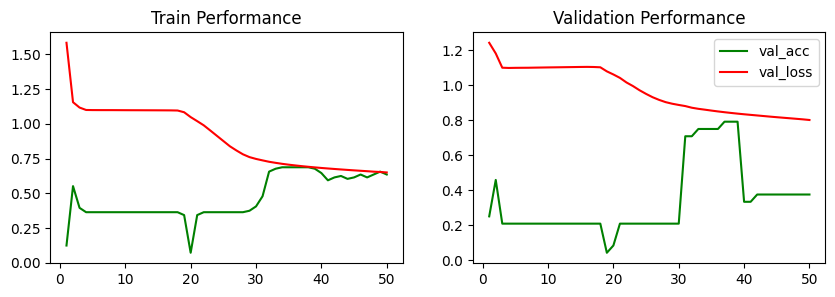

In [ ]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.title('Train Performance')
plt.plot(np.arange(1,51),model.history.history['accuracy'],color='g',label = 'train_acc')
plt.plot(np.arange(1,51),model.history.history['loss'],color='r',label = 'train_loss')

plt.subplot(1,2,2)
plt.title('Validation Performance')
plt.plot(np.arange(1,51),model.history.history['val_accuracy'],color='g',label = 'val_acc')
plt.plot(np.arange(1,51),model.history.history['val_loss'],color='r',label = 'val_loss')
plt.legend(loc=0)
plt.show()

**Test_data**

In [ ]:
# 114 rows are available for test_data
X_test.head(1)

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2


In [ ]:
y_test.head(1)

,species
73,1


In [ ]:
d = []
for i in X_test.columns:
  d.append(X_test[i][73])
print(d)

[6.1, 2.8, 4.7, 1.2]


In [ ]:
d=np.array(d).reshape(1,-1)
d.shape

(1, 4)

In [ ]:
# giving the data to the trained NN
model.predict(d)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[0.2742516 , 0.36602566, 0.35972276]], dtype=float32)

In [ ]:
labels = ['setosa','versicolor','virginica']

In [ ]:
labels[np.argmax(model.predict(d))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'versicolor'

In [ ]:
y_test_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [ ]:
y_test_pred

array([[2.7425161e-01, 3.6602566e-01, 3.5972273e-01],
       [9.8946321e-01, 1.0528563e-02, 8.2639590e-06],
       [2.7425161e-01, 3.6602566e-01, 3.5972273e-01],
       [2.7425161e-01, 3.6602566e-01, 3.5972273e-01],
       [2.7425161e-01, 3.6602566e-01, 3.5972273e-01],
       [9.8518533e-01, 1.4795399e-02, 1.9312671e-05],
       [5.2668637e-01, 3.5023448e-01, 1.2307907e-01],
       [2.7425161e-01, 3.6602566e-01, 3.5972273e-01],
       [2.7425161e-01, 3.6602566e-01, 3.5972273e-01],
       [4.1506702e-01, 3.7616110e-01, 2.0877184e-01],
       [2.7425161e-01, 3.6602566e-01, 3.5972273e-01],
       [9.7976023e-01, 2.0197665e-02, 4.2082411e-05],
       [9.9077135e-01, 9.2226518e-03, 5.9419235e-06],
       [9.8033434e-01, 1.9626385e-02, 3.9162449e-05],
       [9.8548990e-01, 1.4491746e-02, 1.8337661e-05],
       [3.0391309e-01, 3.7273788e-01, 3.2334894e-01],
       [2.7425161e-01, 3.6602566e-01, 3.5972273e-01],
       [3.4748375e-01, 3.7793526e-01, 2.7458099e-01],
       [2.7425161e-01, 3.660

In [ ]:
c = []
for i in y_test_pred:
  if np.argmax(i) == 0:
    c.append(0)
  elif np.argmax(i) == 1:
    c.append(1)
  else:
    c.append(2)

In [ ]:
c

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,c)

array([[10,  0,  0],
       [ 2,  7,  0],
       [ 0, 11,  0]])

In [ ]:
accuracy_score(y_test,c)

0.5666666666666667